In [ ]:
!pip install -q kaggle
# !mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yasserh/wine-quality-dataset

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 47.8MB/s]


In [ ]:
!unzip wine-quality-dataset.zip

Archive:  wine-quality-dataset.zip
  inflating: WineQT.csv              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WineQT.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.drop(columns=['Id'],axis=1,inplace=True)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Axes: >

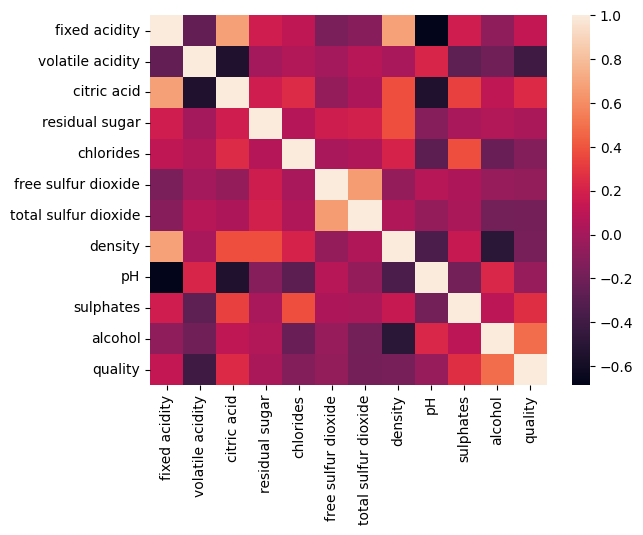

In [ ]:
sns.heatmap(df.corr())

In [ ]:
x=df.iloc[:,0:11]

In [ ]:
y =df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
svr=SVR()

In [ ]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
dtr.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [ ]:
rfr.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
ada.fit(x_train_scaled,y_train)

AdaBoostRegressor()

In [ ]:
gbr.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [ ]:
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
svr.fit(x_train_scaled,y_train)

SVR()

In [ ]:
y_pred=lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2)

Mean Squared Error: 0.4180695534749254
Mean Absolute Error: 0.5010309644209937
0.37470807558671626


In [ ]:
y_pred1=dtr.predict(x_test_scaled)
r2_1 = r2_score(y_test,y_pred1)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2_1)

Mean Squared Error: 0.7292576419213974
Mean Absolute Error: 0.5545851528384279
-0.09072500142604478


In [ ]:
y_pred2=rfr.predict(x_test_scaled)

r2_2 = r2_score(y_test,y_pred2)
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2_2)

Mean Squared Error: 0.4058973799126638
Mean Absolute Error: 0.4704366812227074
0.3929135673949007


In [ ]:
y_pred3=ada.predict(x_test_scaled)

r2_3 = r2_score(y_test,y_pred3)
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2_3)

Mean Squared Error: 0.411485631388697
Mean Absolute Error: 0.5157216370080839
0.3845554162439493


In [ ]:
y_pred4=gbr.predict(x_test_scaled)

r2_4 = r2_score(y_test,y_pred4)
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2_4)

Mean Squared Error: 0.42075790605401003
Mean Absolute Error: 0.5025996648428865
0.3706872012042002


In [ ]:
y_pred5=knn.predict(x_test_scaled)

r2_5 = r2_score(y_test,y_pred5)
mse = mean_squared_error(y_test, y_pred5)
mae = mean_absolute_error(y_test, y_pred5)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(r2_5)

Mean Squared Error: 0.5077729257641921
Mean Absolute Error: 0.5441048034934499
0.24054189721065578


In [ ]:
y_pred6=svr.predict(x_test_scaled)

r2_6 = r2_score(y_test,y_pred6)
mse = mean_squared_error(y_test, y_pred6)
mae = mean_absolute_error(y_test, y_pred6)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

print(r2_6)

Mean Squared Error: 0.4152037894610236
Mean Absolute Error: 0.48124051805917906
0.37899429801136475
